### Installing a new library

In [ ]:
import sys

!{sys.executable} -m pip install stemgraphic

## Importing Necessary Libraries

In [25]:
import numpy as np
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import stemgraphic

## Versions of all packages used

In [26]:
print(np.__version__)
print(scipy.__version__)
print(matplotlib.__version__)
print(pd.__version__)

1.18.4
1.6.3
3.2.1
1.0.3


#### Example 2.3.1 (Industrial revenue) Consider a random sample of 110 small to mid-size companies located in the midwestern region of the United States, and classify them according to their annual revenues (in millions of dollars). Then construct a frequency distribution table for the data obtained by this classification

##### Assign given data to the variable data

In [27]:
data = [4,3,5,3,4,1,2,3,4,3,1,5,3,4,2,1,1,4,5,3,2,5,2,5,2,1,2,3,3,2,1,5,3,2,1,1,2,1,2,4,5,3,5,1,3,1,2,1,4,1,
4,5,4,1,1,2,4,1,4,1,2,4,3,4,1,4,1,4,1,2,1,5,3,1,5,2,1,2,3,1,2,2,1,1,2,1,5,3,2,5,5,2,5,3,5,2,3,2,3,5,2,3,5,5,2,
3,2,5,1,4]

##### To get frequencies

In [28]:
frequencies = Counter(data)
frequencies

Counter({4: 16, 3: 20, 5: 20, 1: 28, 2: 26})

In [29]:
frequency_df = pd.Series(frequencies).sort_index()  # make a series that is sorted by indices (which represent the numbers 1-5)
frequency_df = pd.DataFrame(frequency_df, columns=['Frequency'])  # transform the series into a dataframe/table so we can relabel columns
frequency_df

,Frequency
1,28
2,26
3,20
4,16
5,20


In [30]:
frequency_df['Cum.Frequency'] = np.cumsum(frequency_df['Frequency'])  # adding a cumulative frequency column 
frequency_df

,Frequency,Cum.Frequency
1,28,28
2,26,54
3,20,74
4,16,90
5,20,110


In [31]:
# adding a cumulative percentages column
frequency_df['Cum Percentage'] = frequency_df['Cum.Frequency'] * 100 / frequency_df['Frequency'].sum()
frequency_df

,Frequency,Cum.Frequency,Cum Percentage
1,28,28,25.454545
2,26,54,49.090909
3,20,74,67.272727
4,16,90,81.818182
5,20,110,100.000000


#### Example 2.3.4 (Rod manufacturing) The following data give the lengths (in millimeters) of 40 randomly selected rods manufactured by a company:

`
145 140 120 110 135 150 130 132 137 115
142 115 130 124 139 133 118 127 144 143
131 120 117 129 148 130 121 136 133 147
147 128 142 147 152 122 120 145 126 151
 `

#### Prepare a frequency distribution table for these data.

##### Assign given data to the variable RodData

In [32]:
RodData = [145,140,120,110,135,150,130,132,137,115,142,115,130,124,139,133,118,127,144,
143,131,120,117,129,148,130,121,136,133,147,147,128,142,147,152,122,120,145,126,151]

##### To define the intervals

In [33]:
breaks = pd.interval_range(start=110, end=152, periods=6, closed='left')  # period indicates how many intervals you want
breaks

IntervalIndex([[110, 117), [117, 124), [124, 131), [131, 138), [138, 145), [145, 152)],
              closed='left',
              dtype='interval[int64]')

##### To obtain the frequency of data in each class

In [34]:
rod_data = pd.DataFrame(data=RodData, columns=['Frequency'])
rod_data = rod_data.groupby(pd.cut(RodData, bins=breaks)).count()
rod_data

,Frequency
"[110, 117)",3
"[117, 124)",7
"[124, 131)",8
"[131, 138)",7
"[138, 145)",6
"[145, 152)",8


##### To combine necessary columns

In [35]:
rod_data['Percentage'] = 100 * rod_data['Frequency'] / rod_data['Frequency'].sum()
rod_data

,Frequency,Percentage
"[110, 117)",3,7.692308
"[117, 124)",7,17.948718
"[124, 131)",8,20.512821
"[131, 138)",7,17.948718
"[138, 145)",6,15.384615
"[145, 152)",8,20.512821


In [36]:
rod_data['Cum.Frequency'] = np.cumsum(rod_data['Frequency'])
rod_data

,Frequency,Percentage,Cum.Frequency
"[110, 117)",3,7.692308,3
"[117, 124)",7,17.948718,10
"[124, 131)",8,20.512821,18
"[131, 138)",7,17.948718,25
"[138, 145)",6,15.384615,31
"[145, 152)",8,20.512821,39


In [37]:
rod_data['Cum.Percentage'] = rod_data['Cum.Frequency'] * 100 / rod_data['Frequency'].sum()
rod_data

,Frequency,Percentage,Cum.Frequency,Cum.Percentage
"[110, 117)",3,7.692308,3,7.692308
"[117, 124)",7,17.948718,10,25.641026
"[124, 131)",8,20.512821,18,46.153846
"[131, 138)",7,17.948718,25,64.102564
"[138, 145)",6,15.384615,31,79.487179
"[145, 152)",8,20.512821,39,100.000000


#### Example 2.4.2 (Manufacturing defect types) In a manufacturing operation we are interested in understanding defect rates as a function of various process steps. The inspection points (categories) in the process are initial cutoff, turning, drilling, and assembly. The frequency distribution table for these data is shown in Table 2.4.1. Construct a pie chart for these data.

In [38]:
Freq = np.array([86, 182, 83, 10])
Percents = np.round(100 * Freq / Freq.sum(), 1)  # to calculate percentages

# labels that will go on the pie chart
labels = ['Initial cutoff', 'Turning', 'Drilling', 'Assembly']  # same order as Frequencies

##### Creating the Pie Chart

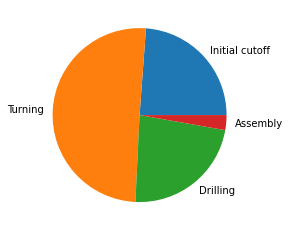

In [39]:
plt.pie(x=Freq, labels=labels)
plt.show()

#### Example 2.4.4 (Auto part defect types) A company that manufactures auto parts is interested in studying the types of defects in parts produced at a particular plant. The following data shows the types of defects that occurred over a certain period:

`
2 1 3 1 2 1 5 4 3 1 2 3 4 3 1 5 2 3 1 2 3 5 4 3 1
5 1 4 2 3 2 1 2 5 4 2 4 2 5 1 2 1 2 1 5 2 1 3 1 4
`
#### Construct a bar chart for the types of defects found in the auto parts.

In [40]:
DefectTypes = [2,1,3,1,2,1,5,4,3,1,2,3,4,3,1,5,2,3,1,2,3,5,4,3,1,5,1,4,2,3,2,1,2,5,4,2,4,2,5,
1,2,1,2,1,5,2,1,3,1,4]

In [41]:
# To obtain the frequencies
counts = Counter(DefectTypes)  # notice how the Defect Type is the 'key' while the Frequency is the corresponding 'value'
counts

Counter({2: 13, 1: 14, 3: 9, 5: 7, 4: 7})

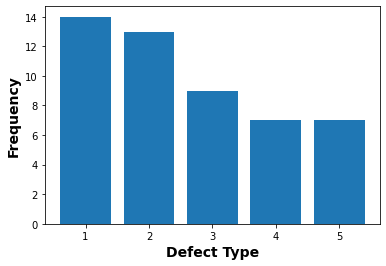

In [42]:
# To obtain the bar chart
plt.bar(x=counts.keys(), height=counts.values())
plt.xlabel("Defect Type", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.show()

#### Example 2.4.5 (Survival times) The following data give the survival times (in hours) of 50 parts involved in a field test under extraneous operating conditions.
`
60 100 130 100 115 30 60 145 75 80 89 57 64 92 87 110 180
195 175 179 159 155 146 157 167 174 87 67 73 109 123 135 129 141
154 166 179 37 49 68 74 89 87 109 119 125 56 39 49 190
`
#### Construct a frequency and cumulative histograms for these data.

In [43]:
SurvTime = [60,100,130,100,115,30,60,145,75,80,89,57,64,92,87,110,180,195,175,179,159,155,
146,157,167,174,87,67,73,109,123,135,129,141,154,166,179,37,49,68,74,89,87,109,119,125,56,39,49,190]

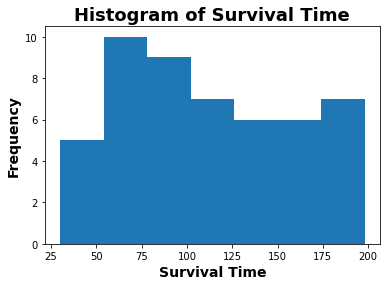

In [44]:
# To plot the histogram
plt.hist(SurvTime, bins=np.arange(30, 199, 24))
plt.title('Histogram of Survival Time', fontsize=18, fontweight='bold')
plt.xlabel('Survival Time', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

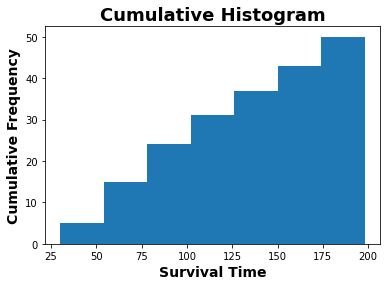

In [45]:
# To plot the cumulative histogram
plt.hist(SurvTime, bins=np.arange(30, 199, 24), cumulative=True)
plt.title('Cumulative Histogram', fontsize=18, fontweight='bold')
plt.xlabel('Survival Time', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Frequency', fontsize=14, fontweight='bold')
plt.show()

#### Example 2.4.7 (Spare parts supply) A manufacturing company has been awarded a huge contract by the Defense Department to supply spare parts. In order to provide these parts on schedule, the company needs to hire a large number of new workers. To estimate how many workers to hire, representatives of the Human Resources Department decided to take a random sample of 80 workers and find the number of parts each worker produces per week. The data collected is given in Table 2.1. Prepare a stem-and-leaf diagram for these data:

`
73 70 68 79 84 85 77 75 61 69 74 80 83 82 86 87 78 81 68 71
74 73 69 68 87 85 86 87 89 90 92 71 93 67 66 65 68 73 72 83
76 74 89 86 91 92 65 64 62 67 63 69 73 69 71 76 77 84 83 85
81 87 93 92 81 80 70 63 65 62 69 74 76 83 85 91 89 90 85 82
`

In [46]:
SpareParts = [73,70,68,79,84,85,77,75,61,69,74,80,83,82,86,87,78,81,68,71,74,73,69,68,87,85,86,87,89,
90,92,71,93,67,66,65,68,73,72,83,76,74,89,86,91,92,65,64,62,67,63,69,73,69,71,76,77,84,83,85,81,87,
93,92,81,80,70,63,65,62,69,74,76,83,85,91,89,90,85,82]

##### Showing a Stem & Leaf plot

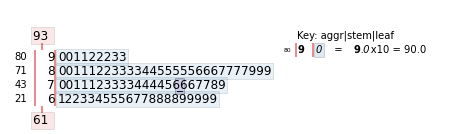

In [55]:
stemgraphic.stem_graphic(SpareParts, scale=10)
plt.show()

#### Example 2.5.14 Calculate numerical measures for the following sample data:
`
6, 8, 12, 9, 14, 18, 17, 23, 21, 23
`

In [60]:
data = pd.Series([6, 8, 12, 9, 14, 18, 17, 23, 21, 23])
data.describe()

count    10.000000
mean     15.100000
std       6.261878
min       6.000000
25%       9.750000
50%      15.500000
75%      20.250000
max      23.000000
dtype: float64

In [83]:
# To obtain the mean
data.mean()

15.1

In [64]:
# To obtain the median
data.median()

15.5

In [65]:
# To obtain the standard deviation
data.std()

6.261877602693231

In [67]:
# To obtain the variance
data.var()

39.211111111111116

In [70]:
# To obtain the mode
data.mode()  # the answer is 23

0    23
dtype: int64

#### (Bus riders) The following data gives the number of persons who take a bus during the off-peak time schedule (3 pm-4 pm.) from Grand Central to Lower Manhattan in New York City. Using technology, find the numerical measures for these data:
`
17 12 12 14 15 16 16 16 16 17 17 18 18 18 19 19 20 20 20 20
20 20 20 20 21 21 21 22 22 23 23 23 24 24 25 26 26 28 28 28
`

In [72]:
x = pd.Series([17,12,12,14,15,16,16,16,16,17,17,18,18,18,19,19,20,20,20,20,20,20,20,20,21,21,21,22,22,23,23,23,
24,24,25,26,26,28,28,28])

In [76]:
# To add the resulting mean, standard deviation, variance, and coefficient of variation into an array:
np.array([x.mean(), x.std(), x.var(), 100*x.std()/x.mean()])

array([20.125     ,  4.08993449, 16.7275641 , 20.32265583])

In [85]:
# To obtain quartiles including min and max
x.describe()[3:]  # the "[3:]" will show a part of a bigger result which gets shown when x.describe() itself is called

min    12.0
25%    17.0
50%    20.0
75%    23.0
max    28.0
dtype: float64

In [86]:
# To obtain the range we find Max-Min
x.max() - x.min()

16

In [88]:
NoiseLevels = [75,79,80,85,88,89,95,96,97,99,104,105,110,115,140]

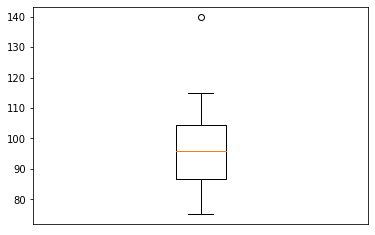

In [94]:
# To plot boxplot
plt.boxplot(x=NoiseLevels)
plt.xticks([])
plt.show()

#### Example 2.9.1 (Cholesterol level and systolic blood pressure) The cholesterol level and the systolic blood pressure of 10 randomly selected US males in the age group 40 to 50 years are given in Table 2.9.1 (see Text). Construct a scatter plot of this data and determine if there is any association between the cholesterol levels and systolic blood pressures.

In [95]:
x = [195,180,220,160,200,220,200,183,139,155]
y = [130,128,138,122,140,148,142,127,116,123]

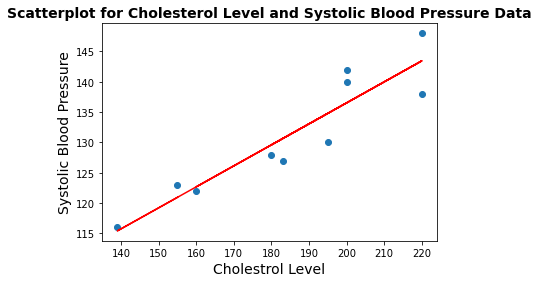

In [106]:
# To plot the data in a scatter plot
plt.scatter(x, y)
pfit = np.polyfit(x, y, 1)  # fitting a linear line through the points
line = np.poly1d(pfit)  # this is a function which will output a 'y' on the trendline for a given 'x'
plt.plot(x, line(x), 'r-')  # the 'r-' just means draw a red line
plt.title("Scatterplot for Cholesterol Level and Systolic Blood Pressure Data", fontsize=14, fontweight='bold')
plt.xlabel("Cholestrol Level", fontsize=14)
plt.ylabel("Systolic Blood Pressure", fontsize=14)
plt.show()

In [110]:
# To calculate the Pearson correlation coefficient
np.corrcoef(x, y)[0, 1]

0.9242063197487278